<div stle="border:solid green 2px; padding: 20px">
    
<b>Привет!</b> Мы рады тебя видеть на территории код-ревьюеров. Ты проделал большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У тебя неограниченное количество попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

<div class="alert alert-info"> <b>Комментарии студента:</b> Привет, Александр! Спасибо за ревью, приступаю к исправлениям )</div>

# Анализ данных для интернет-магазина «Стримчик»

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании  на 2017 год. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### План работ:
- подготовка данных: замена названий столбцов, замена типов данных, обработка пропусков, проверка на дубликаты
- исследовательский анализ данных: анализ продаж за все время, лидеры продаж за все время, потенциально прибыльные платформы, влияние рейтингов на продажи
- портрет пользователей: предпочтения пользователей в Северной Америке, Японии и Европе
- влияние рейтинга ESRB на продажи
- проверка гипотез


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте).
</div>

## Общие сведения

Импортируем библиотеки, которые понадобятся для анализа данных:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st 

Откроем файл с данными и изучим сведения:

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/games.csv'

Уже видно, что данные представлены не полностью: например, в столбцах 'Year_of_Release' и 'Critic_Score' меньше данных, чем в столбцах 'Platform' или 'NA_sales'.   
Также в некоторых столбцах нужно будет изменить тип значений: например, год выпуска должен быть целым числом, соответственно, нужно будет поменять тип данных на int.


In [ ]:
data.head(10)

C помощью фукции head() можно вывести первые 10 строк датасета. В каждой строке содержится название игры, платформа, год выпуска, жанр игры, данные по продажам игры, оценка критиков и пользователей, а также рейтинг от организации ESRB.

In [ ]:
data.describe()

Функция describe() помогает узнать, что данные по продажам представлены полностью, и в Северной Америке продажи прошли наиболее успешно.

<div class="alert alert-block alert-success">✔️
    
<b>__Комментарий ревьюера v1__:</b>
    
Отлично! Первый взгляд на данные есть, план намечен.

## Подготовка данных


### Замена названий столбцов

Приведем к нижнему регистру названия столбцов:

In [ ]:
data.columns = data.columns.str.lower()
data.head(5)

<div class="alert alert-block alert-success">✔️
<b>Комментарий ревьюера v1:</b>
    
В данных может быть более 100 столбцов, и за всеми аналитику тяжко уследить. Данный момент существенно облегчает жизнь =) 

### Проверка на дубликаты

Убедимся, что в датасете нет полных дубликатов:

In [ ]:
data.duplicated().sum()

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверка на дубликаты - основа предобработки данных
</div>

### Обработка пропусков

С помощью функции isna() проверим, сколько пропусков есть в каждом столбце:

In [ ]:
data.isna().sum()

Проверим столбцы 'name' и 'genre' с пропусками: 

In [ ]:
display (data[data['name'].isna()])

In [ ]:
display (data[data['genre'].isna()])

Видно, что игры были выпущены в 1993 году, и игра в строке 659 была популярна в Северной Америке. Но названия игр, жанры, оценки и рейтинги в этих двух строках отсутствуют, поэтому лучше избавиться от этих двух строк, так как они не несут практически никакой полезной информации. Вероятно, эти данные в таблице - одни из самых старых, когда еще не осуществлялся сбор оценок, поэтому  данные отсутствуют.  

Удалим из датасета обе строки:

<div class="alert alert-block alert-success">✔️
<b>Комментарий ревьюера v1:</b>
    
Строки с пропусками в Name лучше удалить. Мы почти ничего не знаем об этих играх.

In [ ]:
data.dropna(subset=['name'], inplace=True)

Проверим строки с пропущенным годом выпуска:

In [ ]:
display ( data[data['year_of_release'].isna()])

Строк с пропущенным годом выпуска 269. По-видимому, год выпуска игр не заполнялся для игр, выпущенных в начале 2000х. Эти строки тоже лучше удалить:

In [ ]:
data.dropna(subset=['year_of_release'], inplace=True)


Рейтинг для многих игр отсутствует, так как он мог не собираться для всех игр, или данные не были перенесены конкретно в этот датасет.
Не будем заполнять пропущенные данные в рейтингах, так как это может привести к искажению данных. Рейтинг присваивается каждой игре индивидуально и непосредственно связан с уровнем продаж. Заменим пропущенные значения в рейтингах на 'unknown'.

Проверим уникальные значения в столбце 'user_score':

In [ ]:
data['user_score'].unique()

Tbd означает 'to be determined', то есть рейтинг еще не присвоен, и это значение можно приравнять к NaN через функцию 'errors - coerce'.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верно, tbd по смыслу то же, что и пропуск</div>

In [ ]:
data['critic_score'] = data['critic_score'].apply(pd.to_numeric, errors='coerce')
data['user_score'] = data['user_score'].apply(pd.to_numeric, errors='coerce')
data['rating'] = data['rating'].apply(pd.to_numeric, errors='coerce')

data['critic_score'] = data['critic_score'].fillna('unknown')
data['user_score'] = data['user_score'].fillna('unknown')
data['rating'] = data['rating'].fillna('unknown')

In [ ]:
data.isna().sum()

В итоге, в датасете не осталось пропусков.

<div class="alert alert-block alert-danger">
    

__Комментарий от ревьюера №1__

Мы заметили ранее,  что  пропущены одновременно и рейтинг, и оценка критиков, и оценка пользователей.Например пропусков рейтинга слишком много, что бы мы могли их восстановить. Удалить также нельзя. Выходит один путь: Пропуски в рейтинге стоит пометить значением-заглушкой (unknown, no_info, -1. и т.д.)  Это нам пригодится при составлении портрета пользователя.
    
---
    
Столбец `year_of_release` имеет малую долю пропусков. Их лучше удалить
</div> 

### Замена типов данных

In [ ]:
data.info()

Заменим типы значений в следующем столбце:

'year_of_release'  - c 'float64' на 'int', так как числа в этих столбцах должны быть целыми; 

'user_score', 'critic_score', ' rating ' теперь содержат strings, поэтому должны оставаться типом object

Оставим тип 'float'  в данных по продажам, так как счет идет в миллионах копий, и числа также не всегда являются целыми.

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('Int64')


Проверим, что типы данных заменились на нужные:

In [ ]:
data.info()

Проверим, что 'tbd' в 'user_score' превратилось в 'unknown':

In [ ]:
data['user_score'].unique()

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличная работа!
</div>

### Cуммарные продажи во всех регионах

Создадим столбец с суммарными продажами по всем регионам: 'all_sales_total':

In [ ]:
data['all_sales_total'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Идеально! Добавить нечего, выбран самый лучше способ
</div>

Проверим, что столбец создался:

In [ ]:
data.head(10)

### Вывод

Мы подготовили данные к дальнейшей обработке:
- названия столбцов приведены к нижнему регистру
- некоторые типы данных заменены на нужные
- обработали пропуски там, где это было нужно. Большая часть пропусков осталась без изменений, так как замена может повлиять на результаты анализа.
- был создан столбец с суммарными продажами по регионам


## Исследовательский анализ данных

#### Количество игр с 1980 по 2016 годы и лидеры продаж за весь период.

Посмотрим, сколько игр выпускалось в разные годы. Видно, что до 1995 года количество игр, выпускаемых ежегодно, не превышало 200. Резкий рост начался с 1993 года и продолжался вплоть до 2009, когда было выпущено более 1400 игр. Затем начался спад, который продолжился до 2016 года.

В дальнейшем мы можем не принимать во внимание данные до 1990 года, так как количество игр, выпущенных в те годы, незначительно.

In [ ]:
(data
 .pivot_table(index='year_of_release', values='name', aggfunc='count') 
 .plot(kind='bar', figsize=(10,4),  style = 'o-', grid=True)
)
plt.title('Количество игр, выпущенных с 1980 по 2016 гг.'+ "\n")
plt.xlabel('Год')
plt.ylabel('кол-во выпущенных игр');

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличная визуализация. При желании можно немного улучшить. Смотри: Для того, чтобы построить графить, нужно сгруппировать данные (в нашем случае год релиза и колличество)
    
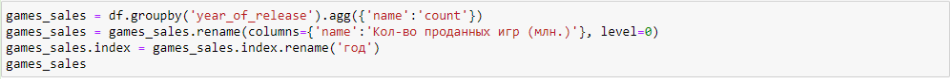
    
---
А потом с помощью библиотеки sns (она мощная, и с ней можно делать всё, что угодно). По данным сгруппированной таблицы строим график. При желании забирай себе =) Главное поиграйся с аргументами и разберись. В дальнейших проектах вы будете строить мощные графики, там пригодится такой навык    
    
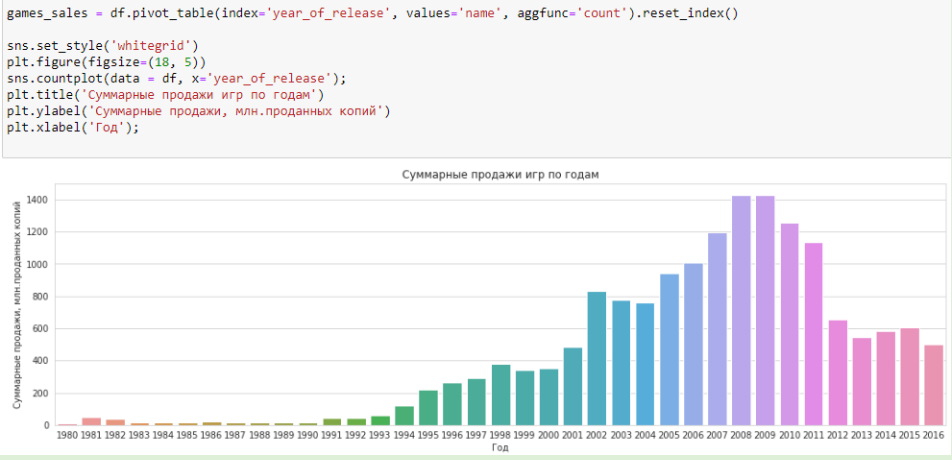 
</div>

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам:

In [ ]:
#platform_sales = platform_sales.groupby('all_sales_total').agg({'all_sales_total':'sum'})
platform_sales = data.pivot_table(index='platform', values='all_sales_total', aggfunc='sum').sort_values('all_sales_total', ascending=True)

plt.figure(figsize=(13,6))
sns.set_style('whitegrid')
sns.barplot(x=platform)
#display (platform_sales)



plt.title('Продажи игр по платформам, с 1980 по 2016 гг.'+ "\n")
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи')
plt.show()

In [ ]:
(data
 .pivot_table(index='platform', values='all_sales_total', aggfunc='sum')
 .sort_values('all_sales_total', ascending=True)
 .plot(kind='bar', figsize=(9,5),  style = 'o-', grid=True)
)

plt.title('Продажи игр по платформам, с 1980 по 2016 гг.'+ "\n")
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи')

In [ ]:
(data
 .pivot_table(index='platform', values='all_sales_total', aggfunc='sum')
 .sort_values('all_sales_total', ascending=True)
 .plot(kind='bar', figsize=(9,5),  style = 'o-', grid=True)
)

plt.title('Продажи игр по платформам, с 1980 по 2016 гг.'+ "\n")
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи')


Для построения графика с распределением по годам, оставим только топ-6 платформ: PS2, X360, PS3, Wii, DS, PS.

In [ ]:
top_platforms = data.groupby('platform') ['all_sales_total'].sum()
top_platforms = pd.DataFrame(top_platforms)
top_platforms = top_platforms.query('all_sales_total > 400').sort_values('all_sales_total', ascending=False).reset_index()
top_platforms.head(10)

In [ ]:
(top_platforms
 .sort_values('all_sales_total', ascending=True)
 .reset_index()
 .plot(kind='bar', x='platform', y = 'all_sales_total', figsize=(7,5), grid='True')
)

plt.title('Продажи игр по платформам, топ-6 платформ'+ "\n")
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи')
plt.show()

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
Такие предупреждения можно убрать 2 способами:
    
1. В конец кода добавить `plt.show()`, но для этого нужно вызвать библиотеку matplotlib
2. В конец кода добавить `;`
    
)
</div>

#### Жизненные циклы для топ-6 платформ, весь период

Проанализируем данные из общего датасета по годам, только для этих 6 платформ:

In [ ]:
top_platforms['platform'].unique()

In [ ]:
top_platforms_names = ['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']
data_top_platforms = data.query('platform in @top_platforms_names')

In [ ]:
(data_top_platforms 
 .query('year_of_release > 1990')
 .pivot_table(index='year_of_release', columns='platform', values='all_sales_total', aggfunc='sum') 
 .plot(kind='line', figsize=(14,7),  style = 'o-', grid=True)
)
plt.title('Tоп-6 платформ, распределение по годам с 1993 по 2016 гг.'+ "\n")
plt.xlabel('Год')
plt.ylabel('кол-во продаж на платформу')


На графике видны пики продаж для каждой из топ-6 приставок. Видно, что каждая платформа проходит свой пик популярности, после чего продажи начинают падать. В среднем, 'жизненный цикл'  платформы составляет около 10 лет.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Полостью согласен с графиками. Распределение PS2 похоже на котика ^^
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здесь еще можно построить тепловую карту
</div>

#### Лидеры продаж за 2016 год. Рост и падение платформ за актуальный период.   Потенциально прибыльные платформы.

Возьмем данные за соответствующий актуальный период, чтобы спланировать продажи на 2017 год. Актуальным периодом будем считать данные с 2013 года, так как данные  за 4-летний  период могут точно указать, куда идет тенденция продаж - на рост или на падение. Четырех точек на графике будет достаточно, чтобы понять тенденцию. 

В то же время, для выбора платформ для продажи на 2017 год, нет смысла ориентироваться на данные трехлетней давности - нужно брать только самые свежие данные за 2016 год. В 2017 году выгоднее всего будет продавать игры для платформ - лидеров продаж за 2016 год, даже если кривая продаж идет на спад. 

Поэтому будем использовать данные за 2016 год для поиска популярных жанров и платформ, и данные за последние три года - для выявления общих тенденций (влияние рейтингов, тенденции продаж).


In [ ]:
data_actual = data.query('year_of_release > 2012')

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит
</div>

In [ ]:
(data_actual 
 .pivot_table(index='year_of_release', columns='platform', values='all_sales_total', aggfunc='sum') 
 .plot(kind='line', figsize=(15,7),  style = 'o-', grid=True)
)
plt.title('Все платформы, продажи с 2013 по 2016 гг.'+ "\n")
plt.xlabel('Год')
plt.ylabel('кол-во суммарных продаж на платформу')

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Легенда по центру графика. Поправишь, пожалуйста?
</div>

Видно, что в целом тенденция продаж идет на спад. Нет ни одного графика, где продажи бы выросли между 2015 и 2016 годом. Однако есть еще несколько платформ, где потенциал продаж не полностью исчерпан. Это платформы, лидирующие по продажам в 2016 году: PS4, 3DS, XOne. 

Рассмотрим подробнее графики нижней части:

In [ ]:
(data_actual 
 .pivot_table(index='year_of_release', columns='platform', values='all_sales_total', aggfunc='sum') 
 .plot(kind='line', figsize=(15,7),  style = 'o-', grid=True)
)
plt.title('Tоп-6 платформ, распределение по годам с 2013 по 2016 гг. Продажи до 20 млн.'+ "\n")
plt.xlabel('Год')
plt.ylabel('кол-во продаж на платформу')
plt.ylim(0, 20)

В нижней части графика также заметен общий спад продаж. Результаты продаж примерно одинаковы у платформ PC, WiiU, PSV, PS3 - порядка 5 млн копий за 2016 год.   
Построим таблицу лидеров продаж за 2016 год:

In [ ]:
data_2016 = data.query('year_of_release == 2016')
data_2016_top_platforms = data_2016.pivot_table(index='platform', values='all_sales_total', aggfunc='sum').sort_values('all_sales_total', 
                                                                                        ascending=False).reset_index()
data_2016_top_platforms.head(10)


В 2016 году по продажам лидировали PS4, XOne, 3DS.

Построим диаграмму размаха  по глобальным продажам игр в 2016 году в разбивке по платформам:

Видны большие выбросы у PS3 и других платформ. Сократим лимит по оси x, чтобы лучше увидеть диаграммы размаха:

In [ ]:
data_actual_catplot = data.query('year_of_release > 2015')
g = sns.catplot(y='platform', x='all_sales_total', data=data_actual_catplot, kind='box');
g.set(xlim=(0, 2))
fig = plt.gcf()
fig.set_size_inches(15, 8)
fig.suptitle('Количество продаж по платформам, 2016 г.' + '\n')

Видно, что на диаграмме размаха в лидерах опять находятся PS4, XOne, 3DS. За счет почти полного отсутствия выбросов, сравнимая с лидерами диаграмма получилась и у платформы WiiU. Хотя по суммарному объему продаж она находится на 5 месте, после PC, медиана продаж у нее самая высокая. Результаты диаграммы WiiU говорят о равномерности доходов по этой платформе. Эта платформа также может быть включена в план продаж на 2017 год.

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1__


Будет лучше, если добавить и график со "всеми данными" (без xlim).
</div>

#### Влияние  отзывов пользователей и критиков на продажи, на примере платформы PS4. 

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами на актуальных данных с 2013 года:

In [ ]:
data_ps4 = data_actual.query('platform == "PS4"')
data_ps4 = data_ps4[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'all_sales_total']].copy()
data_ps4.corr()

In [ ]:
pd.plotting.scatter_matrix(data_ps4, figsize=(10,10), alpha=0.5)
plt.suptitle('Корреляция между отзывами и продажами, все регионы')

В целом, продажи во всех регионах больше коррелируют с отзывами критиков и меньше - с отзывами пользователей. Чем выше рейтинг игры по оценкам критиков, тем выше количество продаж. Особенно сильна корреляция рейтинга критиков и продаж в Северной Америке (0.41) и в 'других' регионах (0.41).
Рейтинг пользователей и продаж коррелирует не так сильно и близок к нулю практически во всех регионах, кроме Японии. В Японии корреляция рейтинга пользователей и продаж составляет 0.17, а рейтинга критиков и продаж - 0.56. То есть в целом, японские пользователи немного больше доверяют рейтингу пользователей и меньше - рейтингу критиков, чем в других регионах.

In [ ]:
data_ps4.plot(kind='scatter', x='critic_score', y='all_sales_total', grid=True, title='Зависимость продаж PS4 от оценки критиков, все регионы')
plt.ylim=(0,8)

data_ps4.plot(kind='scatter', x='user_score', y='all_sales_total', grid=True, title='Зависимость продаж PS4  от оценки пользователей, все регионы')
plt.ylim=(0,8)

На графиках видно, что продажи никогда не бывают высокими, если оценка критиков низкая. Это не всегда бывает так при низкой оценке пользователей. Некоторые игры, низко оцененные пользователями, тем не менее хорошо продаются.

То же должно быть верно и для других платформ: при выборе игр для продажи, ориентироваться стоит в первую очередь на рейтинг критиков. Проверим эту версию на грaфиках для других популярных платформ:

In [ ]:
platforms = ["XOne", "3DS", "PC", "WiiU"]
data_other_platforms = data_actual.query('platform in @platforms')

In [ ]:
sns.scatterplot(x="critic_score", y="all_sales_total", data=data_other_platforms, hue = 'platform' , marker = 'o')
sns.set_style("white")
plt.xlabel("Рейтинг критиков", fontsize= 12)
plt.ylabel("Продажи игр, млн.", fontsize= 12)
plt.title("Продажи в зависимости от рейтинга критиков", fontsize= 15)
plt.show()

In [ ]:
sns.scatterplot(x="user_score", y="all_sales_total", data=data_other_platforms, hue = 'platform' , marker = 'o')
sns.set_style("white")
plt.xlabel("Рейтинг пользователей", fontsize= 12)
plt.ylabel("Продажи игр, млн.", fontsize= 12)
plt.title("Продажи в зависимости от рейтинга пользователей", fontsize= 15)
plt.show()

Та же тенденция наблюдается и у других известных платформ. Продажи строже коррелируют с рейтингом критиков, чем с рейтингом пользователей. Некоторые продажи были высокими, несмотря на низкую оценку игры пользователями, но такого не случалось с играми, низко оцениваемыми критиками.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Ух ты! Один график на котором можно посмотреть корреляцию нескольких платформ! Здорово!))))
</div>

#### Общее распределение игр по жанрам

Построим таблицу и диаграмму с самыми прибыльными жанрами за 2016 год. Как видно, самых прибыльных жанров четыре - 'Shooter', 'Action', 'Sports', 'Role-Playing'. Остальные жанры значительно менее прибыльны:


In [ ]:
data_genres = data.query('year_of_release == 2016')

data_genres = data_genres.pivot_table(index='genre', values='all_sales_total', aggfunc='sum').sort_values('all_sales_total', ascending=False)
plt = data_genres.plot( kind='pie', y='all_sales_total', figsize=(10, 10), wedgeprops={'alpha':0.8})
plt.legend(bbox_to_anchor=(1.1,0.8), loc="center right")


### Вывод

Проанализировав продажи за все годы, мы сделали следующие выводы:
- рост количества новых игр продолжался с 1993 по 2011 год. С 2011 года, продажи пошли на спад, который продолжается до сих пор
- за прошедшие годы, следующие платформы вошли в топ-6 мировых лидеров: PS2, X360, PS3, Wii, DS, PS
- каждая платформа проходит свой пик популярности, после чего продажи начинают падать. В среднем, 'жизненный цикл'  платформы составляет около 10 лет
- эта тенденция спада коррелирует с данными за прошедшие несколько лет. Нет ни одной платформы, чьи продажи бы возросли с 2015 по 2016 год. Тем не менее, некоторые платформы пока не исчерпали свой потенциал и могут быть рекомендованы к продажам в 2017 году. Это платформы PS4, XOne, 3DS, PC, WiiU.
- показатели продаж больше коррелируют с рейтингами критиков, чем с рейтингами пользователей. Япония - единственная страна, где рейтинги пользователей имеют влияние (хоть и слабое) на продажи
- четыре наиболее прибыльных игровых жанра в 2016 году - 'Shooter', 'Action', 'Sports', 'Role-Playing'. Остальные жанры значительно менее прибыльны.


<div class="alert alert-block alert-danger">
    

__Комментарий от ревьюера №1__

Твои расчеты нужно еще немного дополнить. Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи
    
---
    
Давай тут ещё посмотрим на распределение с помощью боксплота?
</div>

##  Портрет пользователя каждого региона

Определим портрет пользователя каждого региона. Найдем топ-5 самых популярных жанров и платформ для каждого региона (NA, EU, JP) в 2016 году. Потом определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

### Предпочтения пользователей в Северной Америке

In [ ]:
data_na = data.query('year_of_release == 2016')
data_na_genre = data_na.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()

data_na_genre.head(5)


In [ ]:
data_na_platform = data_na.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()
data_na_platform.head(5)

Среди пользователей в Северной Америке популярны такие же жанры, как и в мире в целом. Аналогичны и предпочтения среди платформ - топ-5 в Северной Америке также является топ-5 в мире.

<div class="alert alert-block alert-danger">
    

__Комментарий от ревьюера №1__

Давай визуализируем эти данные? Тут идеально подойдет круговая диаграмма
</div>

###  Предпочтения пользователей  в ЕС

In [ ]:
data_eu = data.query('year_of_release == 2016')
data_eu_genre = data_eu.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index()

data_eu_genre.head(5)

In [ ]:
data_eu_platform = data_eu.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index()
data_eu_platform.head(5)

Tоп-4 игр в ЕС такие же, как и в мире, но пятое место занимает жанр 'Racing', а не 'Fighting', как во всем мире. Кроме того, в Европе предпочитают жанр  'Sports' жанру 'Action', а в мире эти жанры занимают 3е и 2е место соответственно.

Топ-5 платформ в ЕС такие же, как в мире и в Северной Америке.

### Предпочтения пользователей в Японии

In [ ]:
data_jp = data.query('year_of_release == 2016')
data_jp_genre = data_jp.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index()

data_jp_genre.head(5)

В Японии вкусы пользователей отличаются от мировых: в пятерку лидеров вошли жанры 'Adventure' и 'Misc', менее популярные в мире. И наоборот, популярные в мире жанры 'Sports' и 'Fighting' в Японии не вошли в топ-5.

In [ ]:
data_jp_platform = data_jp.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index()
data_jp_platform.head(5)

 В японский топ-5 платформ вошли PSV  и PS3, которые не так популярны за пределами Японии. В то же время, в топ японских платформ не вошли популярные в Америке и Европе XOne и PC.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Данные верны =)
</div>

### Влияние рейтинга ESRB

Влияет ли рейтинг ESRB на продажи в отдельном регионе? Проанализируем продажи в разных регионах в зависимости от рейтинга. В 2016 году рейтинги ESRB присуждались всего по 4 категориям: 'E', 'E10+', 'M' и 'T':

In [ ]:
data_esrb = data.query('year_of_release == 2016')
(data_esrb
 .pivot_table(columns='rating', values=['jp_sales', 'eu_sales', 'na_sales'], aggfunc='sum')
 .T
 .plot(kind='bar', ylabel ='Кол-во продаж, млн копий', figsize= (8,6), alpha=0.8, grid=True,
       title='Продажи в разных регионах в зависимости от рейтинга ERSB, 2016 г' + '\n', rot=360)
)


Продажи в разных регионах зависят от рейтингов ESRB. В Японии самые большие продажи - в категории 'T', в Северной Америке и ЕС - в категории 'M'. Игры категории 'E' намного более популярны в ЕС, чем в Северной Америке.

<div class="alert alert-block alert-danger">
    

__Комментарий от ревьюера №1__

При твоем способе подсчета игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах
</div>

###  Вывод

Мы проанализировали предпочтения пользователей из трех регионов - Северной Америки, Европы и Японии и выяснили, что предпочтения в Северной Америке и Европе схожи, но отличаются от японских:

- В европейский и американский топ-5 платформ в 2016 году вошли PS4, XOne, 3DS, WiiU, PC.  
- В японский топ-5 платформ в 2016 году вошли PSV  и PS3, которые не так популярны за пределами Японии. В то же время, в топ японских платформ не вошли популярные в Америке и Европе XOne и PC.
- В 2016 году топ-4 жанров в Америке и  ЕС одинаковые и включают 'Shooter', 'Action', 'Sports', 'Role-Playing'. Пятое место в Европе занимает  жанр 'Racing', а в США -  'Fighting'.
- В Японии вкусы пользователей отличаются от мировых: в пятерку лидеров вошли жанры 'Adventure' и 'Misc', не очень популярные в мире. И наоборот, популярные в мире жанры 'Sports' и 'Fighting' в Японии не вошли в топ 5.
- Продажи в разных регионах зависят от рейтингов ESRB. В Японии самые большие продажи - в категории 'T', в Северной Америке и ЕС - в категории 'M'. Игры категории 'E' намного более популярны в ЕС, чем в Северной Америке.


## Проверка гипотез

Проверим гипотезы:  
- cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- cредние пользовательские рейтинги жанров Action  и Sports  разные.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Гипотезы верные. Отлично!
</div>

### Гипотеза 1: cредние пользовательские рейтинги платформ Xbox One и PC за 2016 год

Проверим гипотезу: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

Чтобы подтвердить это, нужно отвергнуть гипотезу H₀:

H₀ - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые  
H₁ - cредние пользовательские рейтинги платформ Xbox One и PC отличаются

Нам интересны различия в обе стороны - меньшую и большую, поэтому гипотеза H₁ двусторонняя.

H₀ всегда формулируется так, чтобы использовать знак равенства.

H₁ - альтернативная гипотеза, которая противоречит нулевой гипотезе, — либо нулевая гипотеза не отвергается, либо отвергается и принимается H₁.

Возьмем стандартный уровень критической значимости alpha - 0.05.

Используем ttest для двух независимых совокупностей 'ind'. Используем ttest для двух независимых совокупностей 'ind'. Перед тестом избавимся от пропусков в столбце, чтобы они не влияли на расчеты:

In [ ]:
data_xbox = data_2016.query('platform == "XOne"')
data_pc = data_2016.query('platform == "PC"')

data_xbox_rating = data_xbox['user_score']
data_pc_rating = data_pc['user_score'] 

data_xbox_rating = data_xbox_rating.dropna()
data_pc_rating = data_pc_rating.dropna()

print('cреднее xbox:',pd.Series(data_xbox_rating).mean())
print('cреднее pc:',pd.Series(data_pc_rating).mean())

alpha = .05 
results = st.ttest_ind(
    data_xbox_rating,
    data_pc_rating)

print('p-значение:', results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")




Мы получили p-value равное 0.3 , то есть при условии, что нулевая гипотеза верна, вероятность получить такое или большее различие случайно больше уровня критической значимости alpha 0.05.  Значит, нет основания отбросить нулевую гипотезу.


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Как думаешь, что означает p-value?
</div>

### Гипотеза 2: cредние пользовательские рейтинги жанров Action  и Sports за 2016 год

Проверим гипотезу: cредние пользовательские рейтинги жанров Action и Sports разные.

Чтобы подтвердить это, нужно отвергнуть гипотезу H₀:

H₀ - cредние пользовательские рейтинги жанров Action и Sports одинаковые.  
H₁ - cредние пользовательские рейтинги жанров Action и Sports разные.

Нам интересны различия в обе стороны - меньшую и большую, поэтому гипотеза H₁ двусторонняя.

H₀ всегда формулируется так, чтобы использовать знак равенства.

H₁ - альтернативная гипотеза, которая противоречит нулевой гипотезе, — либо нулевая гипотеза не отвергается, либо отвергается и принимается H₁.

Возьмем стандартный уровень критической значимости alpha - 0.05.

Используем ttest для двух независимых совокупностей 'ind'. Перед тестом избавимся от пропусков в столбце, чтобы они не влияли на расчеты:

In [ ]:
data_action = data_2016.query('genre == "Action"')
data_sports = data_2016.query('genre == "Sports"')

data_action_rating = data_action['user_score']
data_sports_rating = data_sports['user_score']

data_action_rating = data_action_rating.dropna()
data_sports_rating = data_sports_rating.dropna()

print('cреднее Action:',pd.Series(data_action_rating).mean())
print('cреднее Sports:',pd.Series(data_sports_rating).mean())

alpha = 0.05 
results = st.ttest_ind(
    data_action_rating,
    data_sports_rating)

print('p-значение:', results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Мы получили p-value 0.00034, то есть при условии, что нулевая гипотеза верна, вероятность получить такое или большее различие случайно равна 0.00034. Это ниже уровня критической значимости alpha 0.05.  Значит, есть основание отбросить нулевую гипотезу, которая утверждает,  что рейтинги одинаковые.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

А почему ты смотришь в гипотезах данные за 2016 год? Если уже выбран актуальнйы (>2012?)
</div>

## Вывод

Был проанализирован датасет с данными из открытых источников, содержащие сведения о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Были сделаны следующие выводы:

- рост количества новых игр продолжался с 1993 по 2011 год. С 2011 года, продажи пошли на спад, который продолжается до сих пор
- за прошедшие годы, следующие платформы вошли в топ-6 мировых лидеров: PS2, X360, PS3, Wii, DS, PS
- каждая платформа проходит свой пик популярности, после чего продажи начинают падать. В среднем, 'жизненный цикл'  платформы составляет около 10 лет
- эта тенденция спада коррелирует с данными за прошедшие несколько лет. Нет ни одной платформы, где продажи бы возросли с 2015 по 2016 год. Тем не менее, некоторые платформы пока не исчерпали свой потенциал и могут быть рекомендованы к продажам в 2017 году. Это платформы PS4, XOne, 3DS, PC, WiiU.
- показатели продаж больше коррелируют с рейтингами критиков, чем с рейтингами пользователей. Япония - единственная страна, где рейтинги пользователей имеют влияние (хоть и слабое) на продажи
- четыре наиболее прибыльных игровых жанра в 2016 году в мире - 'Shooter', 'Action', 'Sports', 'Role-Playing'. Остальные жанры значительно менее прибыльны.
- В европейский и американский топ-5 платформ в 2016 году вошли PS4, XOne, 3DS, WiiU, PC.  
- В японский топ-5 платформ в 2016 году вошли PSV  и PS3, которые не так популярны за пределами Японии. В то же время, в топ японских платформ не вошли популярные в Америке и Европе XOne и PC.
- В 2016 году топ-4 жанров в Америке и  ЕС одинаковые и включают 'Shooter', 'Action', 'Sports', 'Role-Playing'. Пятое место в Европе занимает  жанр 'Racing', а в США -  'Fighting'.
- В Японии вкусы пользователей отличаются от мировых: в пятерку лидеров вошли жанры 'Adventure' и 'Misc', не очень популярные в мире. И наоборот, популярные в мире жанры 'Sports' и 'Fighting' в Японии не вошли в топ 5.
- Продажи в разных регионах зависят от рейтингов ESRB. В Японии самые большие продажи - в категории 'T', в Северной Америке и ЕС - в категории 'M'. Игры категории 'E' намного более популярны в ЕС, чем в Северной Америке.


Рекламную компанию стоит планировать, принимая во внимание рейтинги жанров и платформ за последний год, также с учетом аудитории сайта (предпочтения пользователей в разных регионах различны). Следует принимать во внимание оценку критиков, так как оценка достаточно сильно коррелирует с уровнем продаж.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Шикарный вывод и рекомендации для бизнеса. Кстати, хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. Ведь вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно.
</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 

---

У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями и выявляешь выбросы в числовых данных, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:

1) Заглушки в рейтинге, и оценке критиков, и оценка пользователей (не забудь исключить колличественные заглушки, при постройке графкиков и проверке гипотез)

2) легенда на по центру графика, давай уберем её

3) Общие продажи лучше смотреть через медиану

4) Визуализировать портреты пользователей

5) При твоем способе подсчета игры без рейтинга оказываются полностью исключенными из анализа (заглушка)

6) Гипотезы построены по 2016 году, а нужно по актуальному

7) Подправить выводы, после изменений

---


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

In [ ]:
index=['na_sales', 'eu_sales']
for column in index:
    print ([column].unique_values())

In [ ]:
plt.style.use('seaborn')
 
region = 'na_sales'
 
def top5_in_region(column):
    return (
        data_actual
            .pivot_table(index=column, values=region, aggfunc='sum')
            .sort_values(region, ascending=False)
            .head(5)
    )
 
def sales_pie_by_region(data_actual):
    (
        data_actual
            .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(10, 5), legend=False)
            .set(ylabel='Продажи')
    )
    plt.show()
 
sales_pie_by_region(top5_in_region('platform'))
